<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Regression-Sample-Projects/blob/main/Tabular_Data_TF_Keras_Regression_FFNN_King_County_House_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - TF.Keras - Regression - FFNN - King County House Sales**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/king_county_house_sales_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Exploring Data

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
date,21613,372,20140623T000000,142


## 3. Target Variable Preprocessing

In [ ]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
df.price.isnull().sum()

0

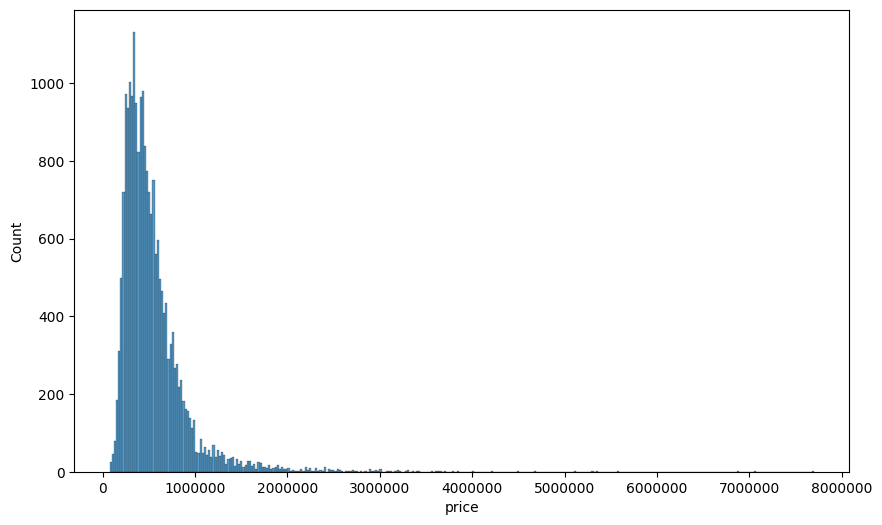

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.price)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
target = df.price

## 4. Removing Target Feature and Useless Features

In [ ]:
df.drop(columns=['price', 'id'], inplace=True)

## 5. Handling Missing Values

In [ ]:
df.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

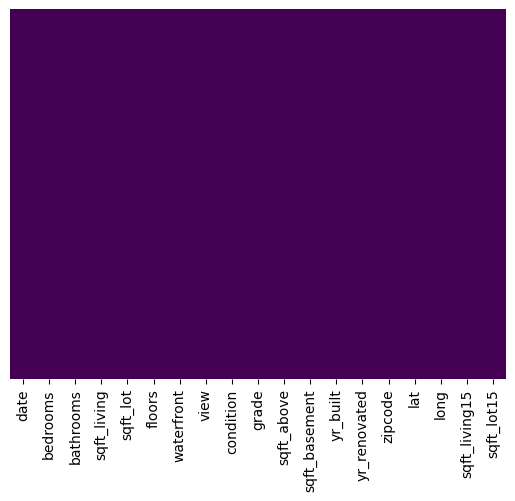

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 6. Handling Non-Numerical Features

In [ ]:
df.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
[col for col in df if df[col].dtype == object]

['date']

In [ ]:
df.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
# zipcode is a categorical variable with high cardinality so we drop it.
df.drop(columns=['zipcode'], inplace=True)

> **date**

In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [ ]:
# we no longer need date variable.
df.drop(columns=['date'], inplace=True)

## 7. Check Correlations

In [ ]:
df['Target'] = target

In [ ]:
df.corr()[['Target']].style.background_gradient(cmap='Greens')

,Target
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434
sqft_above,0.605567


## 8. Train_Test_Split

In [ ]:
y = df.Target.values
X = df.drop(columns=['Target']).values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## 9. Scale the Data

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_val = scaler.transform(X_val)

## 10. Define, Fit Model

In [ ]:
X_train.shape

(15129, 19)

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 3s 10ms/step - loss: 419697721344.0000 - val_loss: 442230767616.0000
Epoch 2/400
119/119 [==============================] - 1s 6ms/step - loss: 419174383616.0000 - val_loss: 440307679232.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 411402272768.0000 - val_loss: 421657935872.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 370307203072.0000 - val_loss: 348450553856.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 264101265408.0000 - val_loss: 210581454848.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 141006880768.0000 - val_loss: 119370350592.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 99350536192.0000 - val_loss: 108027166720.0000
Epoch 8/400
119/119 [==============================] - 1s 4ms/step - loss: 96109060096.0000 - val_loss: 106457341952.0000
Epoch 9/400
119/1

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.196977e+11,4.422308e+11
1,4.191744e+11,4.403077e+11
2,4.114023e+11,4.216579e+11
3,3.703072e+11,3.484506e+11
4,2.641013e+11,2.105815e+11
...,...,...
395,2.751295e+10,3.346917e+10
396,2.751958e+10,3.345654e+10
397,2.750902e+10,3.343545e+10
398,2.751677e+10,3.354115e+10


<Axes: >

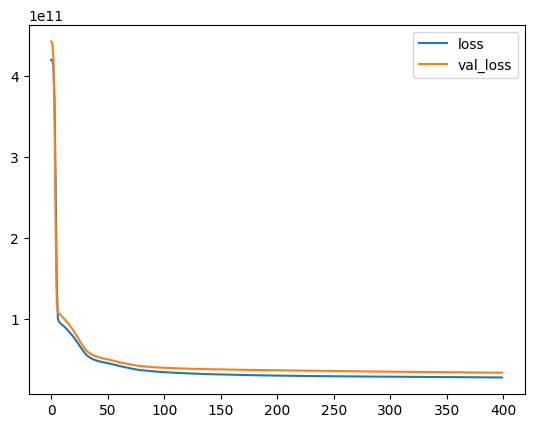

In [ ]:
losses.plot()

## 10. Predict, Evaluate

In [ ]:
predictions = model.predict(X_val)

203/203 [==============================] - 0s 1ms/step


In [ ]:
np.sqrt(mean_squared_error(y_val, predictions))

182874.91690703266

In [ ]:
mean_absolute_error(y_val, predictions)

107911.87762786282

In [ ]:
explained_variance_score(y_val, predictions)

0.7684417093984302

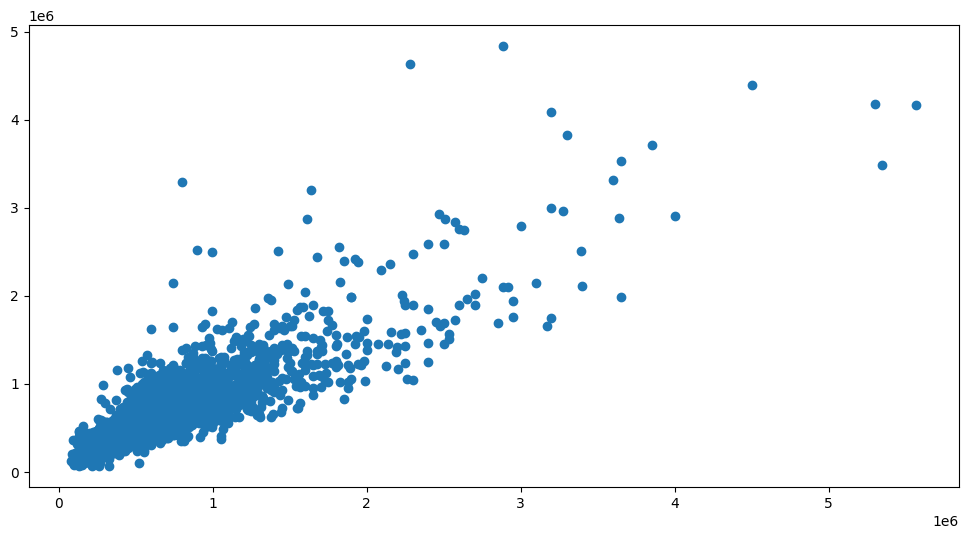

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_val, predictions)